# Track analysis

## Preps

In [1]:
import json
import os
import numpy as np
import matplotlib.pyplot as plt
from lib.draw_util import draw_plain_football_field, draw_dots, draw_player, draw_track_and_relative_others

Load player data from file. Contains an array of players of a **single team**: jersey number, as well as the track. The track consists of points over time in **100ms steps** in form of **tuples (t, x, y)**. With the match time t in ms, and x and y the coordinates in meters from top-left of the pitch. The play direction is always left to right.

Player:
```json
{
    'jersey_no': 18,
    'track': [
        [0, 34.801, 23.753],
        [100, 34.798, 23.646],
        [200, 34.793, 23.545]
        ...
    ]
}
   
```

The player_tracks.json file contains tracks of the **first 20min of a match**.

In [2]:
with open(os.path.abspath(os.path.join("data", "player_tracks.json")), 'r') as f:
    player_data = json.load(f)

As an example find the tracks of all players over the first 40s in the image below

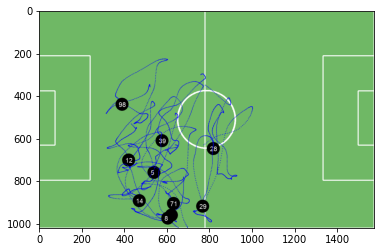

In [3]:
tracks = []
scale = 15

img = draw_plain_football_field(105, 68, scale)

for player in player_data:
    player_track = player["track"]
    points = np.array([p[1:] for p in player_track])
    player
    img = draw_dots(img, points[:40 * 10] * scale, radius=1) # draw the trajectory of the first 40s (10 per second)

    img = draw_player(img, points[40 * 10] * scale, str(player["jersey_no"]), radius = 30, color=(0, 0, 0))
    plt.imshow(img)

In [4]:
# loading the tracks @ minute 25
with open(os.path.abspath(os.path.join("data", "all_players_m25.json")), 'r') as f:
    all_players_m25 = json.load(f)

with open(os.path.abspath(os.path.join("data", "all_players_m30.json")), 'r') as f:
    all_players_m30 = json.load(f) # tracks are shuffled


## Task: Re-assign unassigned tracks

Now we have 3 **unassigned tracks** later in the match, one in **min 25** and **two in min 30**, for the same players as in the player_tracks.json file (this happens for example when the MOT algorithm loses track).

- Player a in min 25 -> `player_a_m25`
- Player b in min 30 -> `player_b_m30`
- Player c in min 30 -> `player_c_m30`


#### Q: What strategies can be used to re-identify / re-assign the jersey numbers of these three unassigned tracks (a, b and c) based on the given player_tracks.json dataset?

#### Perform a data analysis to support the claims you made

In [7]:
# v------ The three tracks to re-assign the jersey-no ------v #
player_a_m25 = all_players_m25[1]
player_b_m30 = all_players_m30[0]
player_c_m30 = all_players_m30[5]

The all_players array contains all players in the respective minute in the first dimension. The second dimension are the track points over time. Each track point again consists of the tuple (t, x, y)  

### Displaying the three tracks

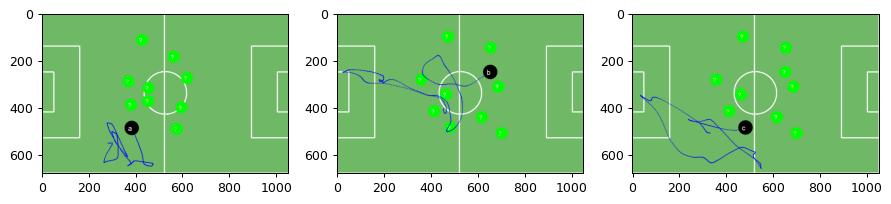

In [8]:
img = draw_plain_football_field(105, 68, scale)

fig=plt.figure(figsize=(12,8), dpi= 90)
axs = fig.subplots(1, 3)
axs[0].imshow(draw_track_and_relative_others("a", player_a_m25, all_players_m25))
axs[1].imshow(draw_track_and_relative_others("b", player_b_m30, all_players_m30))
axs[2].imshow(draw_track_and_relative_others("c", player_c_m30, all_players_m30))
